# Radiology Detail Auxiliary Analysis

In this file we will execute an exploratory analysis of the data at a surface level

## Process

1. Read in the data
2. Observe the data 
3. Clean the data 
4. Perform a surface level analysis of the data
5. brief text analysis

In [1]:
# import and install if not already done
!pip install pandas
import pandas as pd 

radiology_detail_df = pd.read_csv("radiology_detail.csv")
radiology_detail_df.head(3)

,note_id,subject_id,field_name,field_value,field_ordinal
0,10000032-RR-14,10000032,exam_code,C11,1
1,10000032-RR-14,10000032,exam_name,CHEST (PA & LAT),1
2,10000032-RR-15,10000032,exam_code,U314,1


In [2]:
radiology_detail_df.shape

(6046121, 5)

In [3]:
fields_of_interest = radiology_detail_df[['field_name', 'field_value', 'field_ordinal']]
fields_of_interest.head(5)

,field_name,field_value,field_ordinal
0,exam_code,C11,1
1,exam_name,CHEST (PA & LAT),1
2,exam_code,U314,1
3,exam_code,U644,3
4,exam_code,W82,2


In [4]:
value_counts = fields_of_interest['field_value'].value_counts().reset_index()
value_counts.columns = ['Field Value', 'Frequency']
value_counts[:10]

,Field Value,Frequency
0,CHEST (PORTABLE AP),334955
1,C12,334955
2,C11,280102
3,CHEST (PA & LAT),280102
4,Q111,121765
5,CT HEAD W/O CONTRAST,121765
6,Q4432,73838
7,CT ABD & PELVIS WITH CONTRAST,73838
8,CHEST PORT. LINE PLACEMENT,56393
9,C91,56393


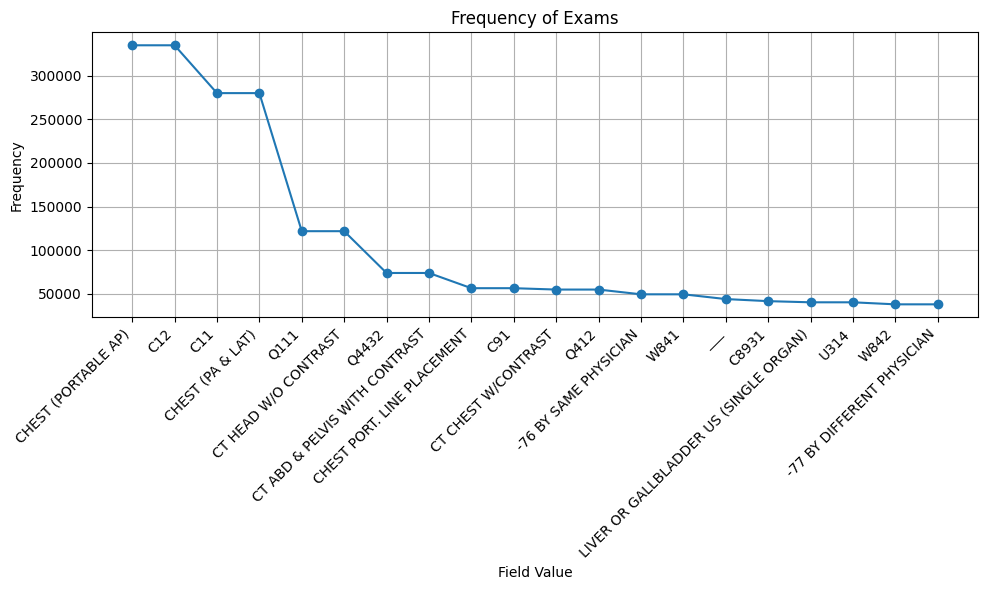

In [6]:
# sorting by frequency for line graph
value_counts = value_counts.sort_values(by="Frequency", ascending=False)

value_counts_top20 = value_counts.head(20)

# create graph using matplot
!pip install matplotlib 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(value_counts_top20['Field Value'], value_counts_top20['Frequency'], marker="o", linestyle='-')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Field Value")
plt.ylabel("Frequency")
plt.title("Frequency of Exams")
plt.grid(True)
plt.tight_layout()
plt.show()